In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Data.csv')

In [ ]:
# Step : Splitting the Data
X = data[['x1', 'x2', 'x3', 'x4']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step : Model Building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Model Evaluation on Train Set
y_train_pred = model.predict(X_train)  # Predictions on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")




Train Mean Squared Error: 0.035360192709566605
Train R-squared: 0.43805614508573687


In [ ]:
# Model Evaluation on Test Set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test R-squared: {r2}")

Test Mean Squared Error: 0.03446043164477337
Test R-squared: 0.4091960259671501


In [ ]:
# Assuming y_test_pred and y_pred are the predicted values
# Binning predictions to create confusion matrix-like representation
bins = [0, 0.5, 1, 1.5, 2]  # Define the bins based on your data range
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']  # Labels for the bins

# Bin the predictions for both training and testing sets
y_train_binned = pd.cut(y_train_pred, bins=bins, labels=bin_labels)
y_test_binned = pd.cut(y_pred, bins=bins, labels=bin_labels)

# Ensuring both arrays have the same length
min_length = min(len(y_train_binned), len(y_test_binned))
y_train_binned = y_train_binned[:min_length]
y_test_binned = y_test_binned[:min_length]

# Creating confusion matrix-like representation using crosstab
confusion_matrix = pd.crosstab(y_test_binned, y_train_binned, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)


Predicted  Bin 1  Bin 2  Bin 3
Actual                        
Bin 1          5     13      3
Bin 2         18     88      7
Bin 3          0      5      0


Interpretation:
MSE Comparison:

Both training and testing MSE values are relatively close, indicating that the model is not significantly overfitting. There's a slight difference between the training and testing MSE, but it's not substantial.
R-squared Comparison:

The R-squared values for both sets are also relatively close. R-squared measures how well the regression model fits the observed data. An R-squared value around 0.4 indicates that the model explains a moderate amount of the variance in the data.
Conclusion:
Given these results, the model seems to perform similarly on both the training and testing sets, suggesting that it's not overfitting. However, the model's predictive power, as indicated by the R-squared values, might be moderate, explaining around 40% of the variance in the data.

Row Labels (Actual): These represent the actual bins into which the test set observations fall.
Column Labels (Predicted): These represent the bins into which the predictions fall.

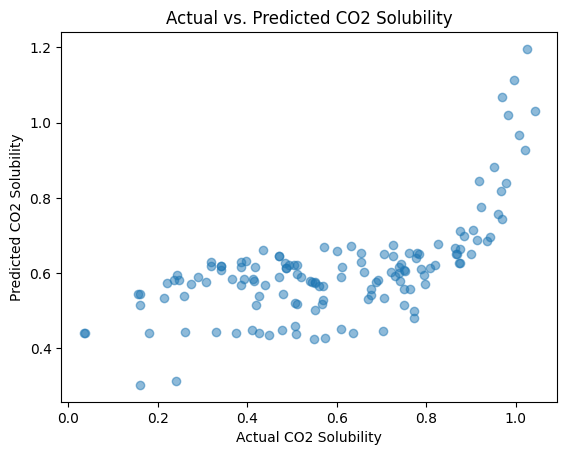

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted CO2 Solubility')
plt.xlabel('Actual CO2 Solubility')
plt.ylabel('Predicted CO2 Solubility')
plt.show()